<div align = "center" class="alert alert-info">
   <h3 class = "display-1">Import all necessary files</h3>
</div>
<br>

For <b><span style="color:Maroon">data anaysis,visualization,numerical solution,data manipulation</span></b> some packages and files need to import.
1. **Pandas**- for data manipulation and analysis 
2. **numpy** - for numerical calcuation,array,function
3. **matplotlib** -for plot visualization
4. **seaborn** - for data visualization
5. **plotly** - for visualization plotly graph(online & offline)
6. **warnings** - for showing warning messages

In [74]:
import numpy as np # use for numerical calcuation,array,function
import pandas as pd # use for data manipulation and analysis 
import matplotlib.pyplot as plt # use for plot visualization
import seaborn as sns # use for data visualization
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Upload database and read
(Upload covid database named as **cleaned-Data** by **pandas** package named as **pd** and also read them by pandas file.)

In [75]:
#read database
corona = pd.read_csv("cleaned-Data.csv")

In [76]:
corona.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


### Free Session Dataset Description:
1. Country: List of countries person visited.
2. Age: Classification of the age group for each person, based on WHO Age Group Standard
3. Symptoms: According to WHO, 5 are major symptoms of COVID-19, Fever, Tiredness, Difficulty in breathing, Dry cough, and sore throat.
4. Experience any other symptoms: Pains, Nasal Congestion, Runny Nose, Diarrhea and Other.
5. Severity: The level of severity, Mild, Moderate, Severe
6. Contact: Has the person contacted some other COVID-19 Patient

In [77]:
corona.columns #finding columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [78]:
#The info() function is used to show range of index,column type,data type,memory usage.
# for knowing datatype and columns type, using here info() function
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [79]:
corona.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**The describe() function computes a summary of statistics pertaining to the DataFrame columns.**
1. count() present total count of every column data.
2. mean()present avg/mean values/data in every column.
3. std() present the standard daviation value in every column.
4. min() present the minimum value of data in every column.
5. max() present the maximum value of data in every column.

In [80]:
corona.shape #finding shape

(316800, 27)

In [81]:
corona.isnull().sum().sum() #finding null value

0

In [82]:
corona.duplicated().sum()# finding duplicate value

0

In [83]:
corona=corona.drop(['Country'],axis='columns')#drop column

    Fever
0  217800
1   99000


Text(0.5, 1.0, 'Fever')

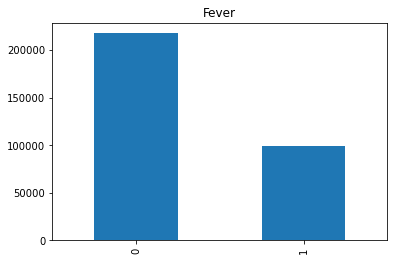

In [84]:
#fever
print(corona['Fever'].value_counts().to_frame())
corona['Fever'].value_counts().plot.bar()
plt.title('Fever')

   Tiredness
1     158400
0     158400


Text(0.5, 1.0, 'Tiredness')

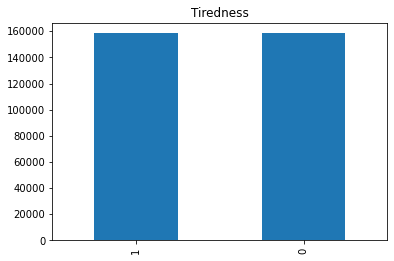

In [85]:
#Tiredness
print(corona[ 'Tiredness'].value_counts().to_frame())
corona[ 'Tiredness'].value_counts().plot.bar()
plt.title( 'Tiredness')

   Dry-Cough
1     178200
0     138600


Text(0.5, 1.0, 'Dry-Cough')

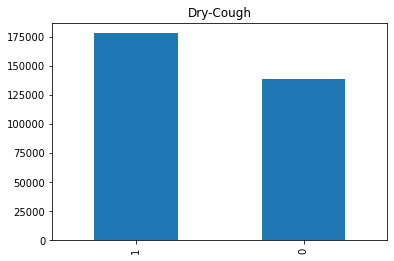

In [86]:
#Dry-Cough
print(corona[ 'Dry-Cough'].value_counts().to_frame())
corona[ 'Dry-Cough'].value_counts().plot.bar()
plt.title( 'Dry-Cough')

   Difficulty-in-Breathing
1                   158400
0                   158400


Text(0.5, 1.0, 'Difficulty-in-Breathing')

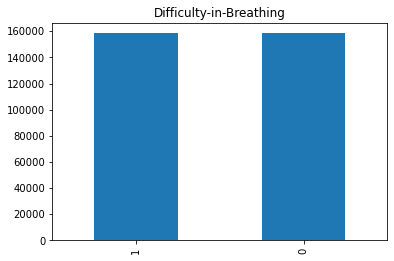

In [87]:
#Difficulty-in-Breathing
print(corona[ 'Difficulty-in-Breathing'].value_counts().to_frame())
corona[ 'Difficulty-in-Breathing'].value_counts().plot.bar()
plt.title('Difficulty-in-Breathing')

   Sore-Throat
0       217800
1        99000


Text(0.5, 1.0, 'Sore-Throat')

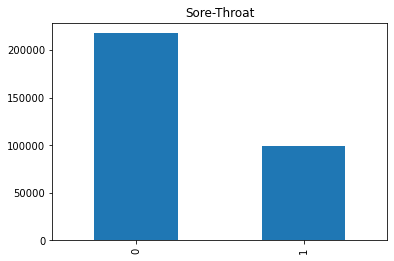

In [88]:
#Sore-Throat
print(corona['Sore-Throat'].value_counts().to_frame())
corona['Sore-Throat'].value_counts().plot.bar()
plt.title('Sore-Throat')

   None_Sympton
0        297000
1         19800


Text(0.5, 1.0, 'None_Sympton')

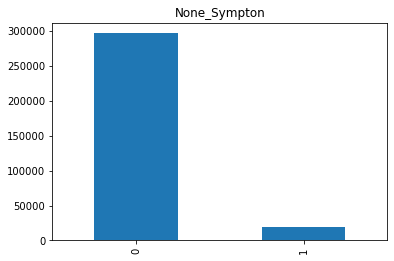

In [89]:
#None_Sympton
print(corona[ 'None_Sympton'].value_counts().to_frame())
corona[ 'None_Sympton'].value_counts().plot.bar()
plt.title( 'None_Sympton')

    Pains
0  201600
1  115200


Text(0.5, 1.0, 'Pains')

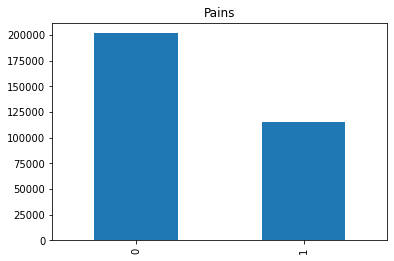

In [90]:
#'Pains'
print(corona[ 'Pains'].value_counts().to_frame())
corona[ 'Pains'].value_counts().plot.bar()
plt.title( 'Pains')

   Nasal-Congestion
1            172800
0            144000


Text(0.5, 1.0, 'Nasal-Congestion')

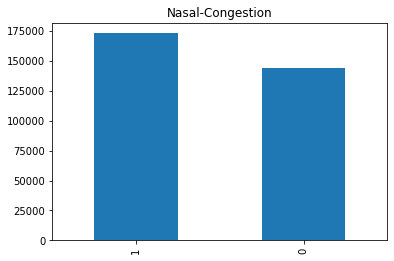

In [91]:
#Nasal-Congestion
print(corona[ 'Nasal-Congestion'].value_counts().to_frame())
corona[ 'Nasal-Congestion'].value_counts().plot.bar()
plt.title( 'Nasal-Congestion')

   Runny-Nose
1      172800
0      144000


Text(0.5, 1.0, 'Runny-Nose')

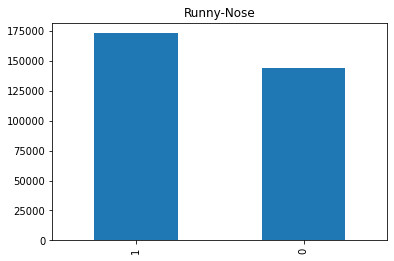

In [92]:
#Runny-Nose
print(corona['Runny-Nose'].value_counts().to_frame())
corona['Runny-Nose'].value_counts().plot.bar()
plt.title('Runny-Nose')

   Diarrhea
0    201600
1    115200


Text(0.5, 1.0, 'Diarrhea')

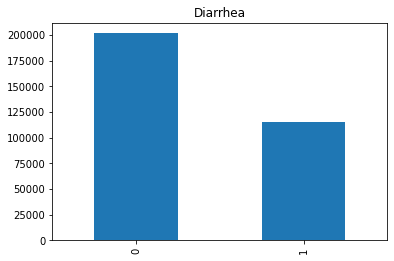

In [93]:
#Diarrhea
print(corona[ 'Diarrhea'].value_counts().to_frame())
corona[ 'Diarrhea'].value_counts().plot.bar()
plt.title( 'Diarrhea')

   None_Experiencing
0             288000
1              28800


Text(0.5, 1.0, 'None_Experiencing')

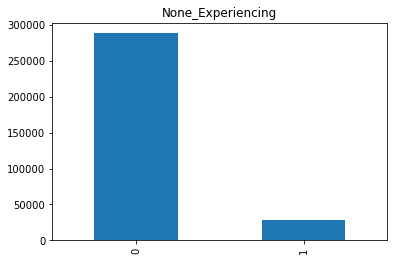

In [94]:
#None_Experiencing
print(corona[ 'None_Experiencing'].value_counts().to_frame())
corona[ 'None_Experiencing'].value_counts().plot.bar()
plt.title( 'None_Experiencing')

   Severity_Severe
0           237600
1            79200


Text(0.5, 1.0, 'Severity_Severe')

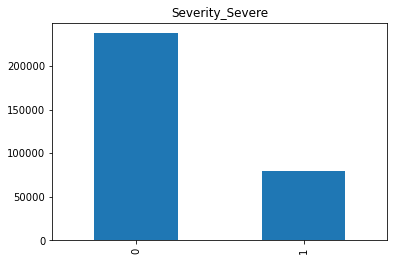

In [95]:
# Severity_Severe
print(corona[ 'Severity_Severe'].value_counts().to_frame())
corona[ 'Severity_Severe'].value_counts().plot.bar()
plt.title( 'Severity_Severe')

Text(0.5, 1.0, 'Correlation heatmap')

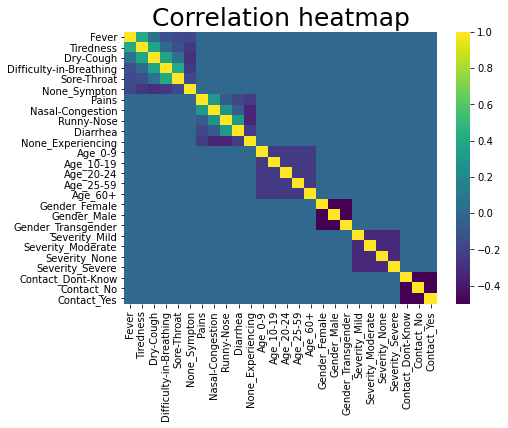

In [96]:
plt.figure(figsize = (7,5))
sns.heatmap(corona.corr(), cmap = 'viridis')
plt.title('Correlation heatmap',size = 25)

# Modelling 

In [97]:
x=corona.iloc[:,0:10].values
y=corona.iloc[:,23].values

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)

In [99]:
print("Size of x_train is:{}\nSize of Y_train is:{}\nSize of x_test is:{}\nSize of Y_test is:{}\n".format(x_train.shape,
                                      y_train.shape,
                                      x_test.shape,
                                      y_test.shape
                                      ))

Size of x_train is:(237600, 10)
Size of Y_train is:(237600,)
Size of x_test is:(79200, 10)
Size of Y_test is:(79200,)



In [100]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [101]:
acc1 = []

In [102]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6685353535353535

In [103]:
# for logisticregression
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(matrix)
print(report)

[[52948     0]
 [26252     0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     52948
           1       0.00      0.00      0.00     26252

    accuracy                           0.67     79200
   macro avg       0.33      0.50      0.40     79200
weighted avg       0.45      0.67      0.54     79200



In [104]:
acc1.append(0.6685)

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators= 100)
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6685353535353535


In [106]:
# for Randomforest
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test,pred)
report = classification_report(y_test,pred)
print(matrix)
print(report)

[[52948     0]
 [26252     0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     52948
           1       0.00      0.00      0.00     26252

    accuracy                           0.67     79200
   macro avg       0.33      0.50      0.40     79200
weighted avg       0.45      0.67      0.54     79200



In [107]:
acc1.append(0.6685)

In [108]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6685353535353535

In [109]:
# for DecissionTree
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(matrix)
print(report)

[[52948     0]
 [26252     0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     52948
           1       0.00      0.00      0.00     26252

    accuracy                           0.67     79200
   macro avg       0.33      0.50      0.40     79200
weighted avg       0.45      0.67      0.54     79200



In [110]:
acc1.append(0.6685)

In [111]:
algo_name = [ 'Logistic Regressio', 'RandomForest','Decision Tree']
accuracy = np.array(acc1)

Text(0, 0.5, 'Algorithm Name')

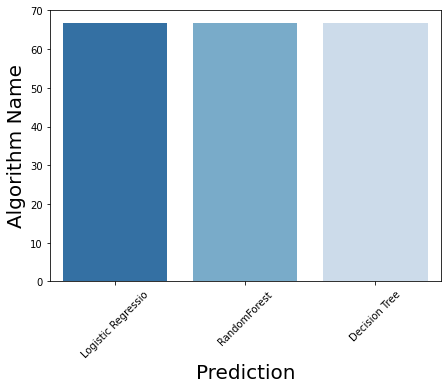

In [112]:
from numpy import median
plt.figure(figsize=(7,5))
sns.barplot(y=accuracy*100,x=algo_name,estimator=median,palette="Blues_r")
plt.xlabel('Prediction',size=20)
plt.xticks(rotation=45)
plt.ylabel('Algorithm Name',size=20)

In [113]:
pred1=[]

In [114]:
pred2=[]

### prediction of chances for age between 10-19 

In [115]:
X=corona[['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing',  'Severity_Severe']]
Y=corona[ 'Age_10-19']

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.25,random_state=0)
print("Size of X_train is:{}\nSize of Y_train is:{}\nSize of X_test is:{}\nSize of Y_test is:{}\n".format(X_train.shape,
                                      Y_train.shape,
                                      X_test.shape,
                                      y_test.shape
                                      ))

Size of X_train is:(237600, 12)
Size of Y_train is:(237600,)
Size of X_test is:(79200, 12)
Size of Y_test is:(79200,)



In [117]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7998484848484848

In [119]:
# for decission tree
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y_test,y_pred)
report = classification_report(Y_test, y_pred)
print(matrix)
print(report)

[[63348     0]
 [15852     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63348
           1       0.00      0.00      0.00     15852

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [120]:
pred1.append(0.79984)

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators= 100)
rfc1.fit(X_train, Y_train)
pred=rfc1.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y_test,pred))

Accuracy for Random Forest on CV data:  0.7998484848484848


In [122]:
# for randomforest
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y_test,pred)
report = classification_report(Y_test,pred)
print(matrix)
print(report)

[[63348     0]
 [15852     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63348
           1       0.00      0.00      0.00     15852

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [123]:
pred2.append(0.79984)

### prediction of chances for age between 21-59

In [124]:
X1=corona[['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing',  'Severity_Severe']]
Y1=corona[ 'Age_25-59']

In [125]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=.25,random_state=0)
print("Size of X1_train is:{}\nSize of Y1_train is:{}\nSize of X1_test is:{}\nSize of Y1_test is:{}\n".format(X1_train.shape,
                                      Y1_train.shape,
                                      X1_test.shape,
                                      Y1_test.shape
                                      ))

Size of X1_train is:(237600, 12)
Size of Y1_train is:(237600,)
Size of X1_test is:(79200, 12)
Size of Y1_test is:(79200,)



In [126]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X1_train=sc_x.fit_transform(X1_train)
X1_test=sc_x.fit_transform(X1_test)

In [127]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X1_train,Y1_train)
y_pred=classifier.predict(X1_test)
y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y1_test,y_pred)
cm
from sklearn.metrics import accuracy_score
accuracy_score(Y1_test,y_pred)

0.7987121212121212

In [128]:
# for decission tree
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y1_test,y_pred)
report = classification_report(Y1_test,y_pred)
print(matrix)
print(report)

[[63258     0]
 [15942     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63258
           1       0.00      0.00      0.00     15942

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [129]:
pred1.append(0.7987)

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators= 100)
rfc1.fit(X1_train, Y1_train)
pred=rfc1.predict(X1_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y1_test,pred))

Accuracy for Random Forest on CV data:  0.7987121212121212


In [131]:
pred2.append(0.7987)

In [132]:
# for randomforest
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y1_test,pred)
report = classification_report(Y1_test,pred)
print(matrix)
print(report)

[[63258     0]
 [15942     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63258
           1       0.00      0.00      0.00     15942

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



### prediction of chances for age between 20-24

In [133]:
X2=corona[['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing',  'Severity_Severe']]
Y2=corona[ 'Age_20-24']

In [134]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=.25,random_state=0)
print("Size of X2_train is:{}\nSize of Y2_train is:{}\nSize of X2_test is:{}\nSize of Y2_test is:{}\n".format(X2_train.shape,
                                      Y2_train.shape,
                                      X2_test.shape,
                                      Y2_test.shape
                                      ))

Size of X2_train is:(237600, 12)
Size of Y2_train is:(237600,)
Size of X2_test is:(79200, 12)
Size of Y2_test is:(79200,)



In [135]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X2_train=sc_x.fit_transform(X2_train)
X2_test=sc_x.fit_transform(X2_test)

In [136]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X2_train,Y2_train)
y_pred=classifier.predict(X2_test)
y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2_test,y_pred)
cm
from sklearn.metrics import accuracy_score
accuracy_score(Y2_test,y_pred)

0.7996338383838384

In [137]:
# for decission tree
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y2_test,y_pred)
report = classification_report(Y2_test,y_pred)
print(matrix)
print(report)

[[63331     0]
 [15869     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63331
           1       0.00      0.00      0.00     15869

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [138]:
pred1.append(0.7996)

In [139]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators= 100)
rfc1.fit(X2_train, Y2_train)
pred=rfc1.predict(X2_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y2_test,pred))

Accuracy for Random Forest on CV data:  0.7996338383838384


In [140]:
# for randomforest
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y2_test,pred)
report = classification_report(Y2_test,pred)
print(matrix)
print(report)

[[63331     0]
 [15869     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63331
           1       0.00      0.00      0.00     15869

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [141]:
pred2.append(0.7996)

### prediction of chances for age between 0-09

In [142]:
X3=corona[['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing',  'Severity_Severe']]
Y3=corona[ 'Age_0-9']

In [143]:
from sklearn.model_selection import train_test_split
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X3,Y3,test_size=.25,random_state=0)
print("Size of X3_train is:{}\nSize of Y3_train is:{}\nSize of X3_test is:{}\nSize of Y3_test is:{}\n".format(X3_train.shape,
                                      Y3_train.shape,
                                      X3_test.shape,
                                      Y3_test.shape
                                      ))

Size of X3_train is:(237600, 12)
Size of Y3_train is:(237600,)
Size of X3_test is:(79200, 12)
Size of Y3_test is:(79200,)



In [144]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X3_train=sc_x.fit_transform(X3_train)
X3_test=sc_x.fit_transform(X3_test)

In [145]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X3_train,Y3_train)
y_pred=classifier.predict(X3_test)
y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y3_test,y_pred)
cm
from sklearn.metrics import accuracy_score
accuracy_score(Y3_test,y_pred)

0.8013257575757575

In [146]:
# for decission tree
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y3_test,y_pred)
report = classification_report(Y3_test,y_pred)
print(matrix)
print(report)

[[63465     0]
 [15735     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63465
           1       0.00      0.00      0.00     15735

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [147]:
pred1.append(0.8013)

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(n_estimators= 100)
rfc1.fit(X3_train, Y3_train)
pred=rfc1.predict(X3_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y3_test,pred))

Accuracy for Random Forest on CV data:  0.8013257575757575


In [149]:
# for randomforest
from sklearn.metrics import classification_report
matrix = confusion_matrix(Y3_test,pred)
report = classification_report(Y3_test,pred)
print(matrix)
print(report)

[[63465     0]
 [15735     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     63465
           1       0.00      0.00      0.00     15735

    accuracy                           0.80     79200
   macro avg       0.40      0.50      0.44     79200
weighted avg       0.64      0.80      0.71     79200



In [150]:
pred2.append(0.8013)

In [160]:
s1=pd.DataFrame(pred1, columns=['Agorithm_value for decission_tree '],index=['Age_10-19', 'Age_21-59', 'Age_20-24','Age_0-9'])

In [161]:
s1

,Agorithm_value for decission_tree
Age_10-19,0.79984
Age_21-59,0.79870
Age_20-24,0.79960
Age_0-9,0.80130


In [162]:
s2=pd.DataFrame(pred2, columns=['Agorithm_value for Randomforest '],index=['Age_10-19', 'Age_21-59', 'Age_20-24','Age_0-9'])
s2

,Agorithm_value for Randomforest
Age_10-19,0.79984
Age_21-59,0.79870
Age_20-24,0.79960
Age_0-9,0.80130
